# ML assignment 4

## Q1

Given a dataset of children who had kyphosis(a spinal condition) and they underwent an  operation. <br />
The dataset has the following columns: <br />
Kyphosis: whether or not the kyphosis was present after operation. <br />
Age: age of children in months <br />
Number: number of vertebrae involved in the operation <br />
Start: the topmost vertebrae number involved in the operation.\
Use 70% of the data for training and rest for testing. Use Decision Tree Classifier model and
make predictions for the test data. Also evaluate the model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('kyphosis.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
data.shape

(81, 4)

In [6]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


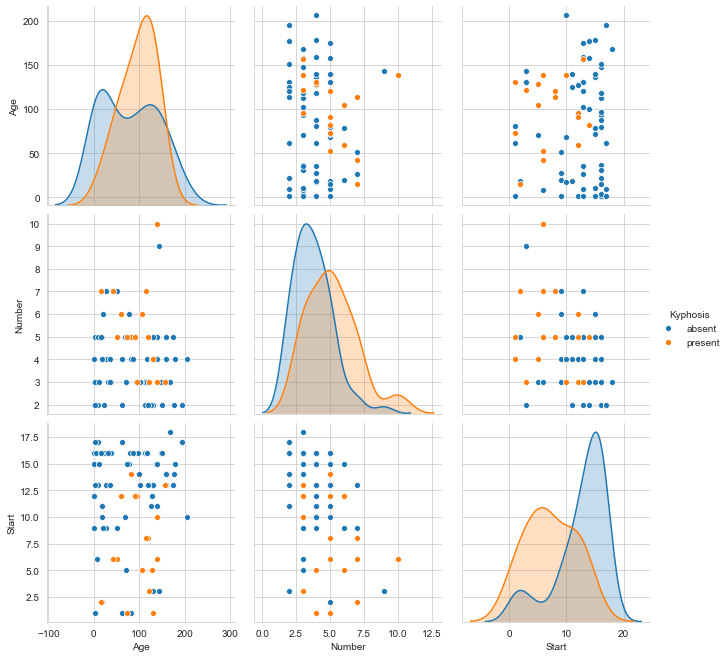

In [7]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(data, hue = 'Kyphosis', height = 3)
plt.show()

In [8]:
print('Number of vertebrae involved in the operation: ', data['Number'].unique())
print('The topmost vertebrae number involved in the operation: ', data['Number'].unique())

Number of vertebrae involved in the operation:  [ 3  4  5  2  6  7  9 10]
The topmost vertebrae number involved in the operation:  [ 3  4  5  2  6  7  9 10]


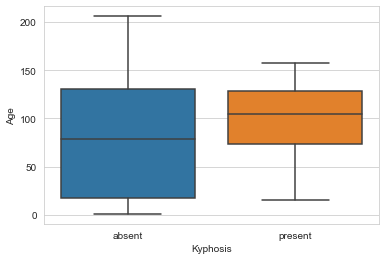

In [9]:
sns.boxplot(x= 'Kyphosis', y= 'Age', data= data)
plt.show()

## Q2 
For the dataset used in Q5 use a Random Forest Classifier model and make predictions for
the test data. Also evaluate the model.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = data['Kyphosis']
x = data.drop(['Kyphosis'], axis = 1)


In [12]:
Y = pd.get_dummies(y, prefix = "Kyphosis")

Y

,Kyphosis_absent,Kyphosis_present
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
76,0,1
77,1,0
78,1,0
79,0,1


In [13]:
Y.shape

(81, 2)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size = 0.3,random_state=4)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  

In [16]:
for i in range(2,20):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(x_train, y_train)
    predictions = rf.predict(x_test)
    print('n = ' + str(i) +' Score: ' , metrics.accuracy_score(y_test, predictions))

n = 2 Score:  0.84
n = 3 Score:  0.64
n = 4 Score:  0.68
n = 5 Score:  0.8
n = 6 Score:  0.76
n = 7 Score:  0.84
n = 8 Score:  0.84
n = 9 Score:  0.88
n = 10 Score:  0.72
n = 11 Score:  0.8
n = 12 Score:  0.8
n = 13 Score:  0.84
n = 14 Score:  0.84
n = 15 Score:  0.84
n = 16 Score:  0.84
n = 17 Score:  0.84
n = 18 Score:  0.84
n = 19 Score:  0.8


##### How to tune hyperparameter?
each time i run the code, i get different score with same number of estimatores

## Q3 
Given the confusion matrix, find out precision, recall, F1 score and misclassification rate.

<img src="cm.jpg" width="500" height="400">


From the given confusion matrix \
TP = 10 \
FP = 8 \
TN = 60 \
FN = 22 

precision_neg = 60 / (60+22) = 0.73\
precision_pos = 10 / (10+8) = 0.55\
precision = (0.73 + 0.55 ) / 2 = 0.64


recall_neg = 60 / (60+8) = 0.88 \
recall_pos = 10 / (10+22) = 0.31\
recall = (0.88 + 0.31) / 2 = 0.59

F1 Score = 2 x recall x precision / (recall + precision ) = 0.61

## Q4

State True or False\
● Decisions trees are not sensitive to the data they are trained on.  **False**\
● Random forest consists of a large number of individual decision trees that operate as an ensemble. **True**\
● The fundamental concept behind random forest is the wisdom of crowds. **True**\
● In a random forest, all the decision trees used should be highly correlated. **False**

## Q5
What is bagging and feature randomness in Random Forest Classifier?

Bagging is an ensemble technique of machine learning models where multiple models are trained parallely  
and final output of model is aggregate of all individual models\
Feature randomness in random forest is random sampling of column(features) which are useed to train base learners